# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data
data_folder = os.path.join(os.getcwd(),'traffic-signs-data')
training_file = os.path.join(data_folder,'train.p')
testing_file = os.path.join(data_folder,'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
print('training data: {}'.format(X_train.shape))
print('test data: {}'.format(X_test.shape[0]))
print(y_train)

training data: (39209, 32, 32, 3)
test data: 12630
[ 0  0  0 ..., 42 42 42]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


x= [  210.  2220.  2250.  1410.  1980.  1860.   420.  1440.  1410.  1470.
  2010.  1320.  2100.  2160.   780.   630.   420.  1110.  1200.   210.
   360.   330.   390.   510.   270.  1500.   600.   240.   540.   270.
   450.   780.   240.   689.   420.  1200.   390.   210.  2070.   300.
   360.   480.]  Bins= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


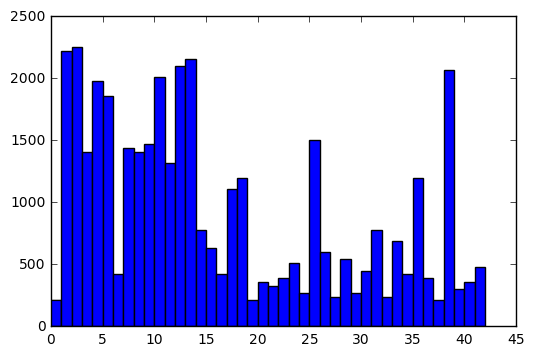

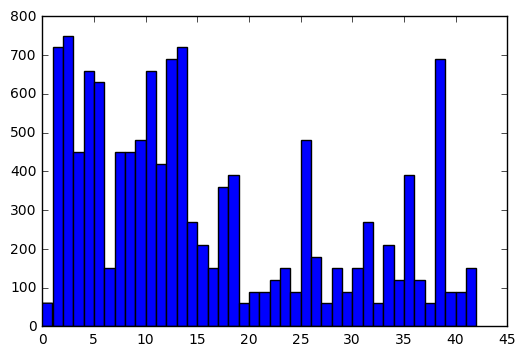

In [4]:
## Plotting how distributed is the training data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
x,bins,p=plt.hist(y_train,bins=range(43))
print('x=',x,' Bins=',bins)

plt.figure()
xbar,binsbar,pbar = plt.hist(y_test,bins=range(43))

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

42


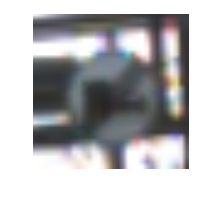

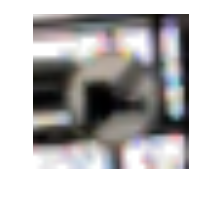

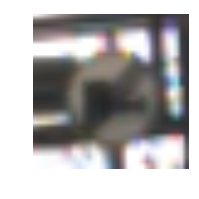

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline
chk = False
if chk:
    y_requested= 42
    y_ind = np.argwhere(y_train == y_requested)
    index = random.choice(seq=y_ind[:,0])
    #print(y_ind[:,0])
else:
    index = random.randint(0, n_train)
image = X_train[index].squeeze()

CBGRimage = image.copy()
CBGRimage[:,:,0],CBGRimage[:,:,2] = image[:,:,2],image[:,:,0]
YUVimage = cv2.cvtColor(CBGRimage, cv2.COLOR_BGR2YUV)
YUVimage[:,:,0] = cv2.equalizeHist(YUVimage[:,:,0])
conv_img = cv2.cvtColor(YUVimage,cv2.COLOR_YUV2BGR)
RGB_img = conv_img.copy()
RGB_img[:,:,0],RGB_img[:,:,2] = conv_img[:,:,2],conv_img[:,:,0]
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(CBGRimage)
#plt.colorbar()

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(RGB_img)
#plt.colorbar()

plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(image)
#plt.colorbar()

print(y_train[index])




In [6]:
# getting the class name dictionary for Traffic signs
import csv
name_Dict = {}
with open(os.path.join(os.getcwd(),'signnames.csv'),'r') as csvfile:
    classData = csv.DictReader(csvfile)
    for row in classData:
        index = int(row['ClassId'])
        name = row['SignName']
        name_Dict[index] = name

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
def hist_equalization(x):
    ''' Adjusts brightness of a colour image through histogram equalization.
    Input -> x, a RGB image
    Output -> y a RGB image after histogram equalization'''
    BGRimage = x.copy()
    # Converting RGB to BGR
    BGRimage[:,:,0],BGRimage[:,:,2] = x[:,:,2],x[:,:,0]
    #Converting BGR to YUV
    YUVimage = cv2.cvtColor(BGRimage,cv2.COLOR_BGR2YUV)
    # Histogram Equalizer
    YUVimage[:,:,0] = cv2.equalizeHist(YUVimage[:,:,0])
    conv_img = cv2.cvtColor(YUVimage,cv2.COLOR_YUV2BGR)
    # Getting Output Image in RGB
    y = conv_img.copy()
    y[:,:,0],y[:,:,2] = conv_img[:,:,2],conv_img[:,:,0]
    return y

def image_proc_set(x):
    '''Operates on a set of images with size as [number of images, height, width, channels]'''
    y = np.zeros_like(x)
    for ind in range(x.shape[0]):
        img = x[ind,:,:,:]
        conv_img = hist_equalization(img)
        y[ind,:,:,:] = conv_img
    return y
    
# Brightness equalization
# X_train = image_proc_set(X_train)
# X_test = image_proc_set(X_test)


In [8]:
# Normalizing the data (between -0.5 and 0.5) by dividing every pixel by the maximum value of 255
X_train = X_train.astype("float")
X_test = X_test.astype("float")
X_train = -0.5 + X_train/255
X_test = -0.5 + X_test/255
from sklearn.utils import shuffle
# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Normalization of the input images was done by limiting their values from -0.5 to 0.5. This was achieved by dividing the pixel values by the maximum of 255 and subtracting -0.5 from it. I had also previously implemented a histogram equalizer for pictures by equalizing the histogram of the intensity of the Y channel from YUV image, but this didn't help me achieve a better classification efficiency. Therefore, despite the functions being created, only the pixel values were normalized to fit in the range of -0.5 and 0.5.

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
n_valid = int(0.2*n_train)   # 20% of Training data is for Validation
split_X_train, split_X_valid = np.split(X_train, [n_train-n_valid])
split_y_train, split_y_valid = np.split(y_train, [n_train-n_valid])
print('train examples: {}'.format(split_X_train.shape))
print('Validation examples: {}'.format(split_X_valid.shape))

train examples: (31368, 32, 32, 3)
Validation examples: (7841, 32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I withheld my intentions to generate new data, but that was just a choice I made. Looking at the histogram of the distribution of training data, it was obvious that classes were inequally distributed. This can have an effect in training the classifier, but I insisted upon changing the hyperparameters for the Neural Network architecture instead. The training data was split into training and validation data on 80-20% basis. The test data was the same as provided.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
EPOCHS = 60
BATCH_SIZE = 128

def LeNet5(x, keep_prob, mu = 0, sigma = 0.1):
    # Layer 1
    c1_W = tf.Variable(tf.truncated_normal([5,5,3,16],mean = mu, stddev= sigma))
    c1_b = tf.Variable(tf.zeros(16))
    conv1 = tf.nn.conv2d(x,c1_W,strides=[1,1,1,1],padding='VALID')
    conv1 = tf.nn.bias_add(conv1,c1_b)
    # Activation
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1,keep_prob)
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    pool1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    c2_W = tf.Variable(tf.truncated_normal([5,5,16,64],mean=mu, stddev= sigma))
    c2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(pool1,c2_W,strides=[1,1,1,1],padding='VALID')
    conv2 = tf.nn.bias_add(conv2,c2_b)
    # Activation
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)
    # Pooling: Input = 10x10x64. Output = 5x5x64.
    pool2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Flatten. Input = 5x5x64. Output = 1600.
    flat = flatten(pool2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal([1600,400], mean= mu, stddev= sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.add(tf.matmul(flat,fc1_W),fc1_b)
    # Activation
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)
    
    # Layer 4: Fully Connected. Input = 400. Output = 100.
    fc2_W = tf.Variable(tf.truncated_normal([400,100], mean= mu, stddev= sigma))
    fc2_b = tf.Variable(tf.zeros(100))
    fc2 = tf.add(tf.matmul(fc1,fc2_W),fc2_b)
    # Activation
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal([100,43], mean= mu, stddev= sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.add(tf.matmul(fc2,fc3_W),fc3_b)
    # Activation
    #logits = tf.nn.softmax(fc3)
    logits = fc3
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final Architecture is based on LeNet 5 with 2 Convolutions + Pooling and 3 fully connected network. Changes that I made - increased the depth of the individual convolution layer (Layer1 = 16, Layer2 = 64, FC Layer 3 = 1600-400, FC Layer 4 = 400-100, FC Layer 5 = 100-43 (output)) and added dropouts at each layer.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed
# Continuing model development
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0001
prob = tf.placeholder(tf.float32)
logits = LeNet5(x,prob)
pred = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

pred_class = tf.argmax(pred, 1)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
def evaluate(X_data, y_data, keep_prob = 1):
    num_examples = len(X_data)
    total_accuracy = 0
    total_cost = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, prob: keep_prob})
        cost = sess.run(loss_operation, feed_dict={x:batch_x, y:batch_y, prob: keep_prob})
        total_accuracy += (accuracy * len(batch_x))
        total_cost += (cost*len(batch_x))
    return (total_accuracy / num_examples,total_cost/num_examples)
def prediction(X_data,y_data, keep_prob = 1):
    num_examples = len(X_data)
    y_pred = np.zeros(num_examples)
    sess = tf.get_default_session()
    for offset in range(0,num_examples, BATCH_SIZE):
        batch_x,batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        sess_pred = sess.run(pred_class, feed_dict={x:batch_x, y:batch_y, prob:keep_prob})
        #print(sess_pred)
        y_pred[offset:offset+BATCH_SIZE] = sess_pred
    return y_pred

In [12]:
import os
saver_folder = os.path.join(os.getcwd(),'saver_files')
if not os.path.exists(saver_folder):
    os.makedirs(saver_folder)
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        split_X_train, split_y_train = shuffle(split_X_train, split_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = split_X_train[offset:end], split_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, prob: 0.5})
            
        validation_accuracy, valid_cost = evaluate(split_X_valid, split_y_valid)
        train_accuracy, train_cost = evaluate(split_X_train,split_y_train)
        #cost = eval_cost(split_X_train,split_y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy)," Validation Cost = {:.3f}".format(valid_cost))
        print("Training Accuracy = {:.3f}".format(train_accuracy)," Training Cost = {:.3f}".format(train_cost))
        print()
        #print(os.path.join(saver_folder,'lenet_ep{}'.format(i+1)))
        #print()
        saver.save(sess, os.path.join(saver_folder,'lenet_ep'), global_step= i+1)
    saver.save(sess, os.path.join(saver_folder,'lenet'))
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.161  Validation Cost = 3.645
Training Accuracy = 0.163  Training Cost = 3.644

EPOCH 2 ...
Validation Accuracy = 0.319  Validation Cost = 3.432
Training Accuracy = 0.320  Training Cost = 3.431

EPOCH 3 ...
Validation Accuracy = 0.445  Validation Cost = 3.093
Training Accuracy = 0.446  Training Cost = 3.089

EPOCH 4 ...
Validation Accuracy = 0.512  Validation Cost = 2.788
Training Accuracy = 0.509  Training Cost = 2.781

EPOCH 5 ...
Validation Accuracy = 0.556  Validation Cost = 2.489
Training Accuracy = 0.559  Training Cost = 2.480

EPOCH 6 ...
Validation Accuracy = 0.620  Validation Cost = 2.268
Training Accuracy = 0.619  Training Cost = 2.260

EPOCH 7 ...
Validation Accuracy = 0.668  Validation Cost = 1.923
Training Accuracy = 0.669  Training Cost = 1.916

EPOCH 8 ...
Validation Accuracy = 0.693  Validation Cost = 1.782
Training Accuracy = 0.695  Training Cost = 1.775

EPOCH 9 ...
Validation Accuracy = 0.732  Validation Cost = 1.641
Tr

In [13]:
restore_file = os.path.join(saver_folder,'lenet_ep-60')
#tf.reset_default_graph()
#saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess,restore_file)
    test_accuracy, test_cost = evaluate(X_test, y_test)
    y_pred = prediction(X_test,y_test)
    #print(y_pred)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Cost = {:.3f}".format(test_cost))

Test Accuracy = 0.948
Test Cost = 0.290


(12630,) (12630,)
[ 1.          0.88481013  0.96047431  0.97716895  0.9695586   0.93821138
  0.98387097  0.97066667  0.84732824  0.96544715  0.99381762  0.95443645
  0.9984985   0.99306519  0.99630996  0.92888889  0.99328859  0.99719888
  0.93611111  0.75        0.81481481  0.83076923  0.93220339  0.83647799
  0.8902439   0.96529284  0.86413043  0.76315789  0.94666667  0.80733945
  0.93162393  0.8427673   0.78947368  1.          0.95967742  1.
  0.99107143  0.98360656  0.97038082  0.98863636  0.90721649  0.95652174
  0.94680851]


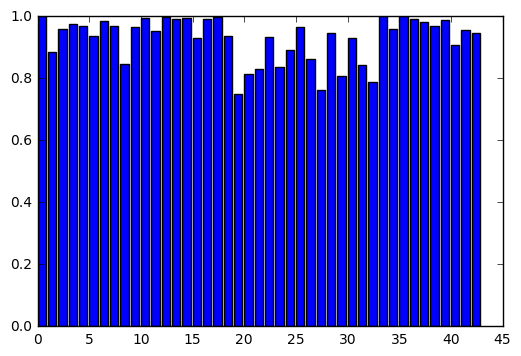

In [14]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    #thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, cm[i, j],
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(y_pred.shape,y_test.shape)
#f1_score = metrics.f1_score(y_test, y_pred,average=None)
precision = metrics.precision_score(y_test,y_pred,average=None)
print(precision)
plt.figure()
plt.bar(range(43),precision)
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(confusion_matrix, classes=range(43),
#                      title='Confusion matrix, without normalization')
#print(confusion_matrix[:,19])

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** The optimizer used was the Adam Optimizer which has a better convergence as compared to the Gradient Descent Optimizer, but its computationally more expensive. The initial learning rate of 0.001 was turning out to be too high for the system and therefore was reduced to 0.0001. This was low and resulted in small incremental gains during training, but the result was satisfying. The Batch size was the same (128) and the number of Epochs were kept to 60. The Hyperparameters - mean and the standard deviation for defining the weights of the neural network were 0 and 0.1 respectively. The dropout keep probability was kept at 0.5 for training.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The Architecute of LeNet is well known architecture. While training, I faced a problem of overfitting. Therefore dropouts were introduced into the system. The depth of the convolutions were increased to increase more parameters at the same time. The learning rate and epochs were adjusted to suit the optimizer.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

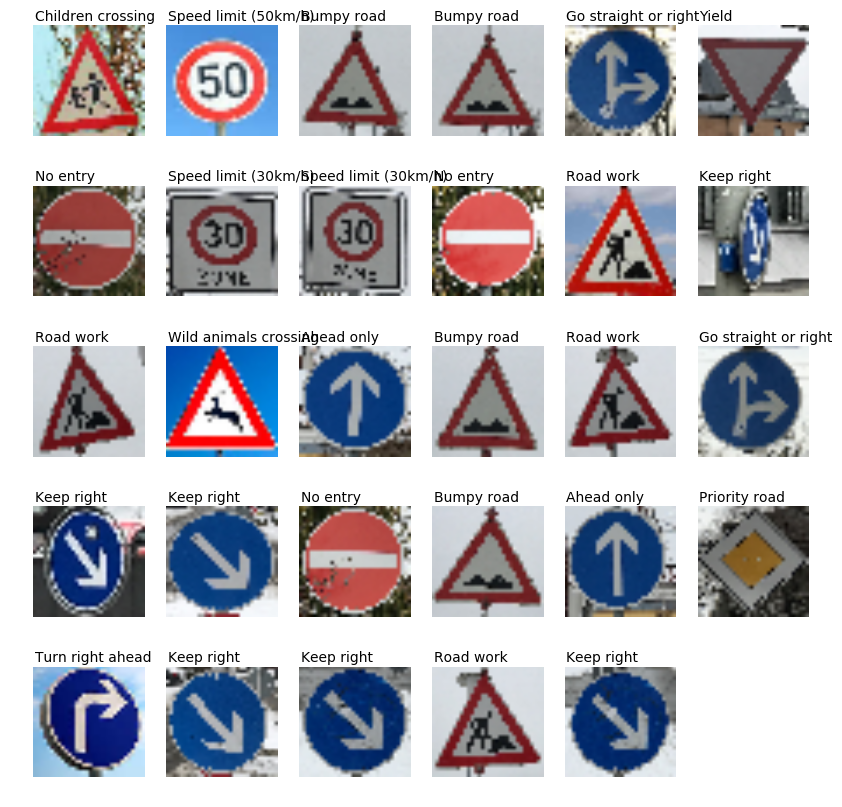

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
## Got the new Data from Haniq Ying

newDataFolder = os.path.join(os.getcwd(),'new_traffic_signs')
with open(os.path.join(newDataFolder,'new_signs.p'), 'rb') as file:
    newData = pickle.load(file)
    
#print(newData)
new_X_test = newData['data']
new_y_test = newData['labels']
n_new_samples = new_y_test.size
plt.figure(figsize=(10,10))
for i in range(n_new_samples):
    plt.subplot(5,6,i+1)
    plt.imshow(new_X_test[i])
    plt.axis('off')
    plt.text(0,-2,name_Dict[new_y_test[i]])

In [20]:
# Preprocessing
# Normalizing the data (between -0.5 and 0.5) by dividing every pixel by the maximum value of 255
new_X = new_X_test.astype("float")
new_X = -0.5 + new_X/255
new_y = new_y_test.copy()

In [21]:
## Running Tensorflow to identify new images
#saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,restore_file)
    new_acc, new_cost = evaluate(new_X, new_y)
    print("New Test Accuracy = {:.3f}".format(new_acc))

New Test Accuracy = 0.897


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** A set of new images were used by me from Haniq Ying. He had taken a fresh set of photos of German traffic signs and shared it on the internet. Out of the set, 5 photos were chosen at random and the classifier was able to identify all of them correctly. These 5 images were taken during day as the brightness was good. However, the angle of warp of the photos may have caused some difficulties. There were 3 images from the entire set of 29 photos which were incorrectly classified (plotted in the last segment).

[  9.   2.  18.  25.   5.]


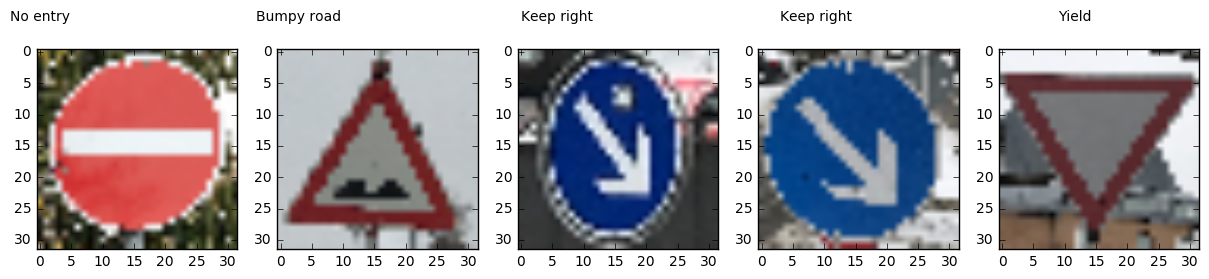

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
n_subset_samples = 5
new_ind = np.zeros(n_subset_samples)
for i in range(n_subset_samples):
    new_ind[i] = random.randint(0,new_y_test.size-1)
print(new_ind)
_,ht,wd,ch = new_X.shape
new_X_subset = np.zeros((n_subset_samples,ht,wd,ch))
new_y_subset = np.zeros(n_subset_samples)
plt.figure(figsize=[15,15])
for i in range(n_subset_samples):
    new_X_subset[i,:,:,:] = new_X[int(new_ind[i])]
    new_y_subset[i] = new_y[int(new_ind[i])]
    plt.subplot(1,5,i+1)
    plt.imshow(new_X_test[int(new_ind[i])])
    plt.text(2.9*(i),-5,name_Dict[new_y_test[int(new_ind[i])]],horizontalalignment="center")

In [23]:
## Run Predictions on the 5 examples

with tf.Session() as sess:
    saver.restore(sess,restore_file)
    new_pred = sess.run(pred, feed_dict={x:new_X_subset,y:new_y_subset,prob:1})
    pred_ind = np.argmax(new_pred,1)
    new_pred_acc = np.mean(np.equal(pred_ind,new_y_subset))
    #print(new_pred.shape)
    #print(pred_ind)
    #print(new_y_subset)
    print("Accuracy on the new 5 subset of pictures is {0:.3f}%".format(new_pred_acc*100))
    

Accuracy on the new 5 subset of pictures is 100.000%


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model is slightly less accurate to predict the new data with respect to the test data. The accuracy of the test data was found to be 94.8% and the accuracy of the new collected data was 89.7%

In [24]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top5_pred = tf.nn.top_k(pred,5)
with tf.Session() as sess:
    saver.restore(sess,restore_file)
    prob_top5 = sess.run(top5_pred, feed_dict={x:new_X_subset,y:new_y_subset,prob:1})
    top5_values = prob_top5.values
    top5_indices = prob_top5.indices


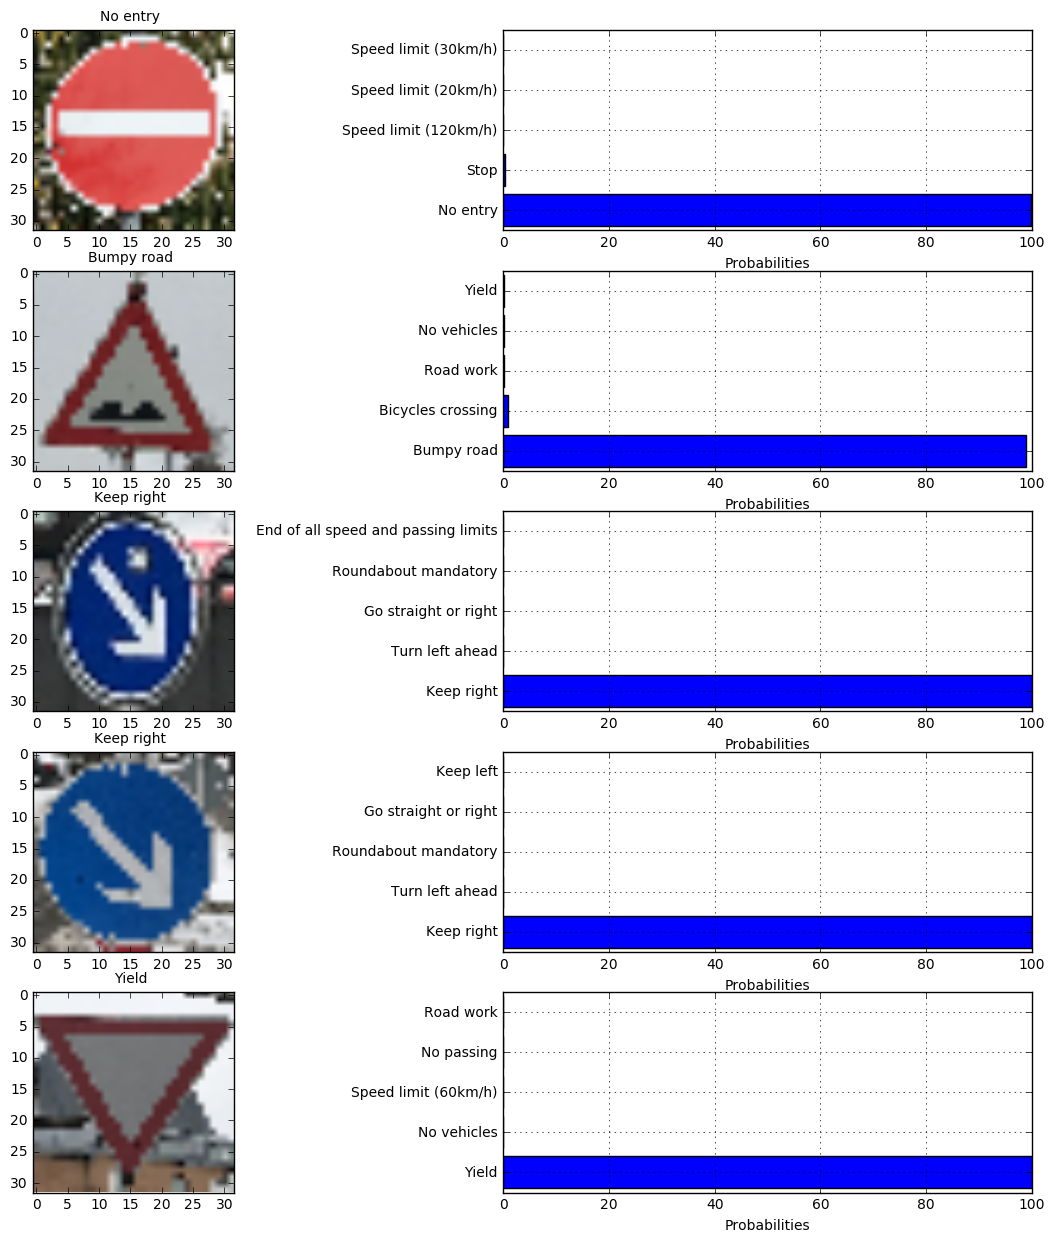

In [25]:
# Plotting images along with top 5 classified probabilities
plt.figure(figsize=[15,15])
for i in range(n_subset_samples):
    plt.subplot(n_subset_samples,2,2*i+1)
    plt.imshow(new_X_test[int(new_ind[i])])
    plt.text(15,-2,name_Dict[new_y_test[int(new_ind[i])]],horizontalalignment="center")
    plt.subplot(n_subset_samples,2,2*i+2)
    p_val = top5_values[i,:]*100
    y_val = [name_Dict[ind] for ind in top5_indices[i,:]]
    pos = np.arange(5)+.5 
    plt.barh(pos,p_val, align='center')
    plt.yticks(pos,y_val)
    plt.xlabel('Probabilities')
    plt.xlim([0,100])
    plt.grid(True)

In [26]:
# Getting top 5 predicitons of the entire new test set
with tf.Session() as sess:
    saver.restore(sess,restore_file)
    prob_top5_all = sess.run(top5_pred, feed_dict={x:new_X,y:new_y,prob:1})
    top5_allvalues = prob_top5_all.values
    top5_allindices = prob_top5_all.indices

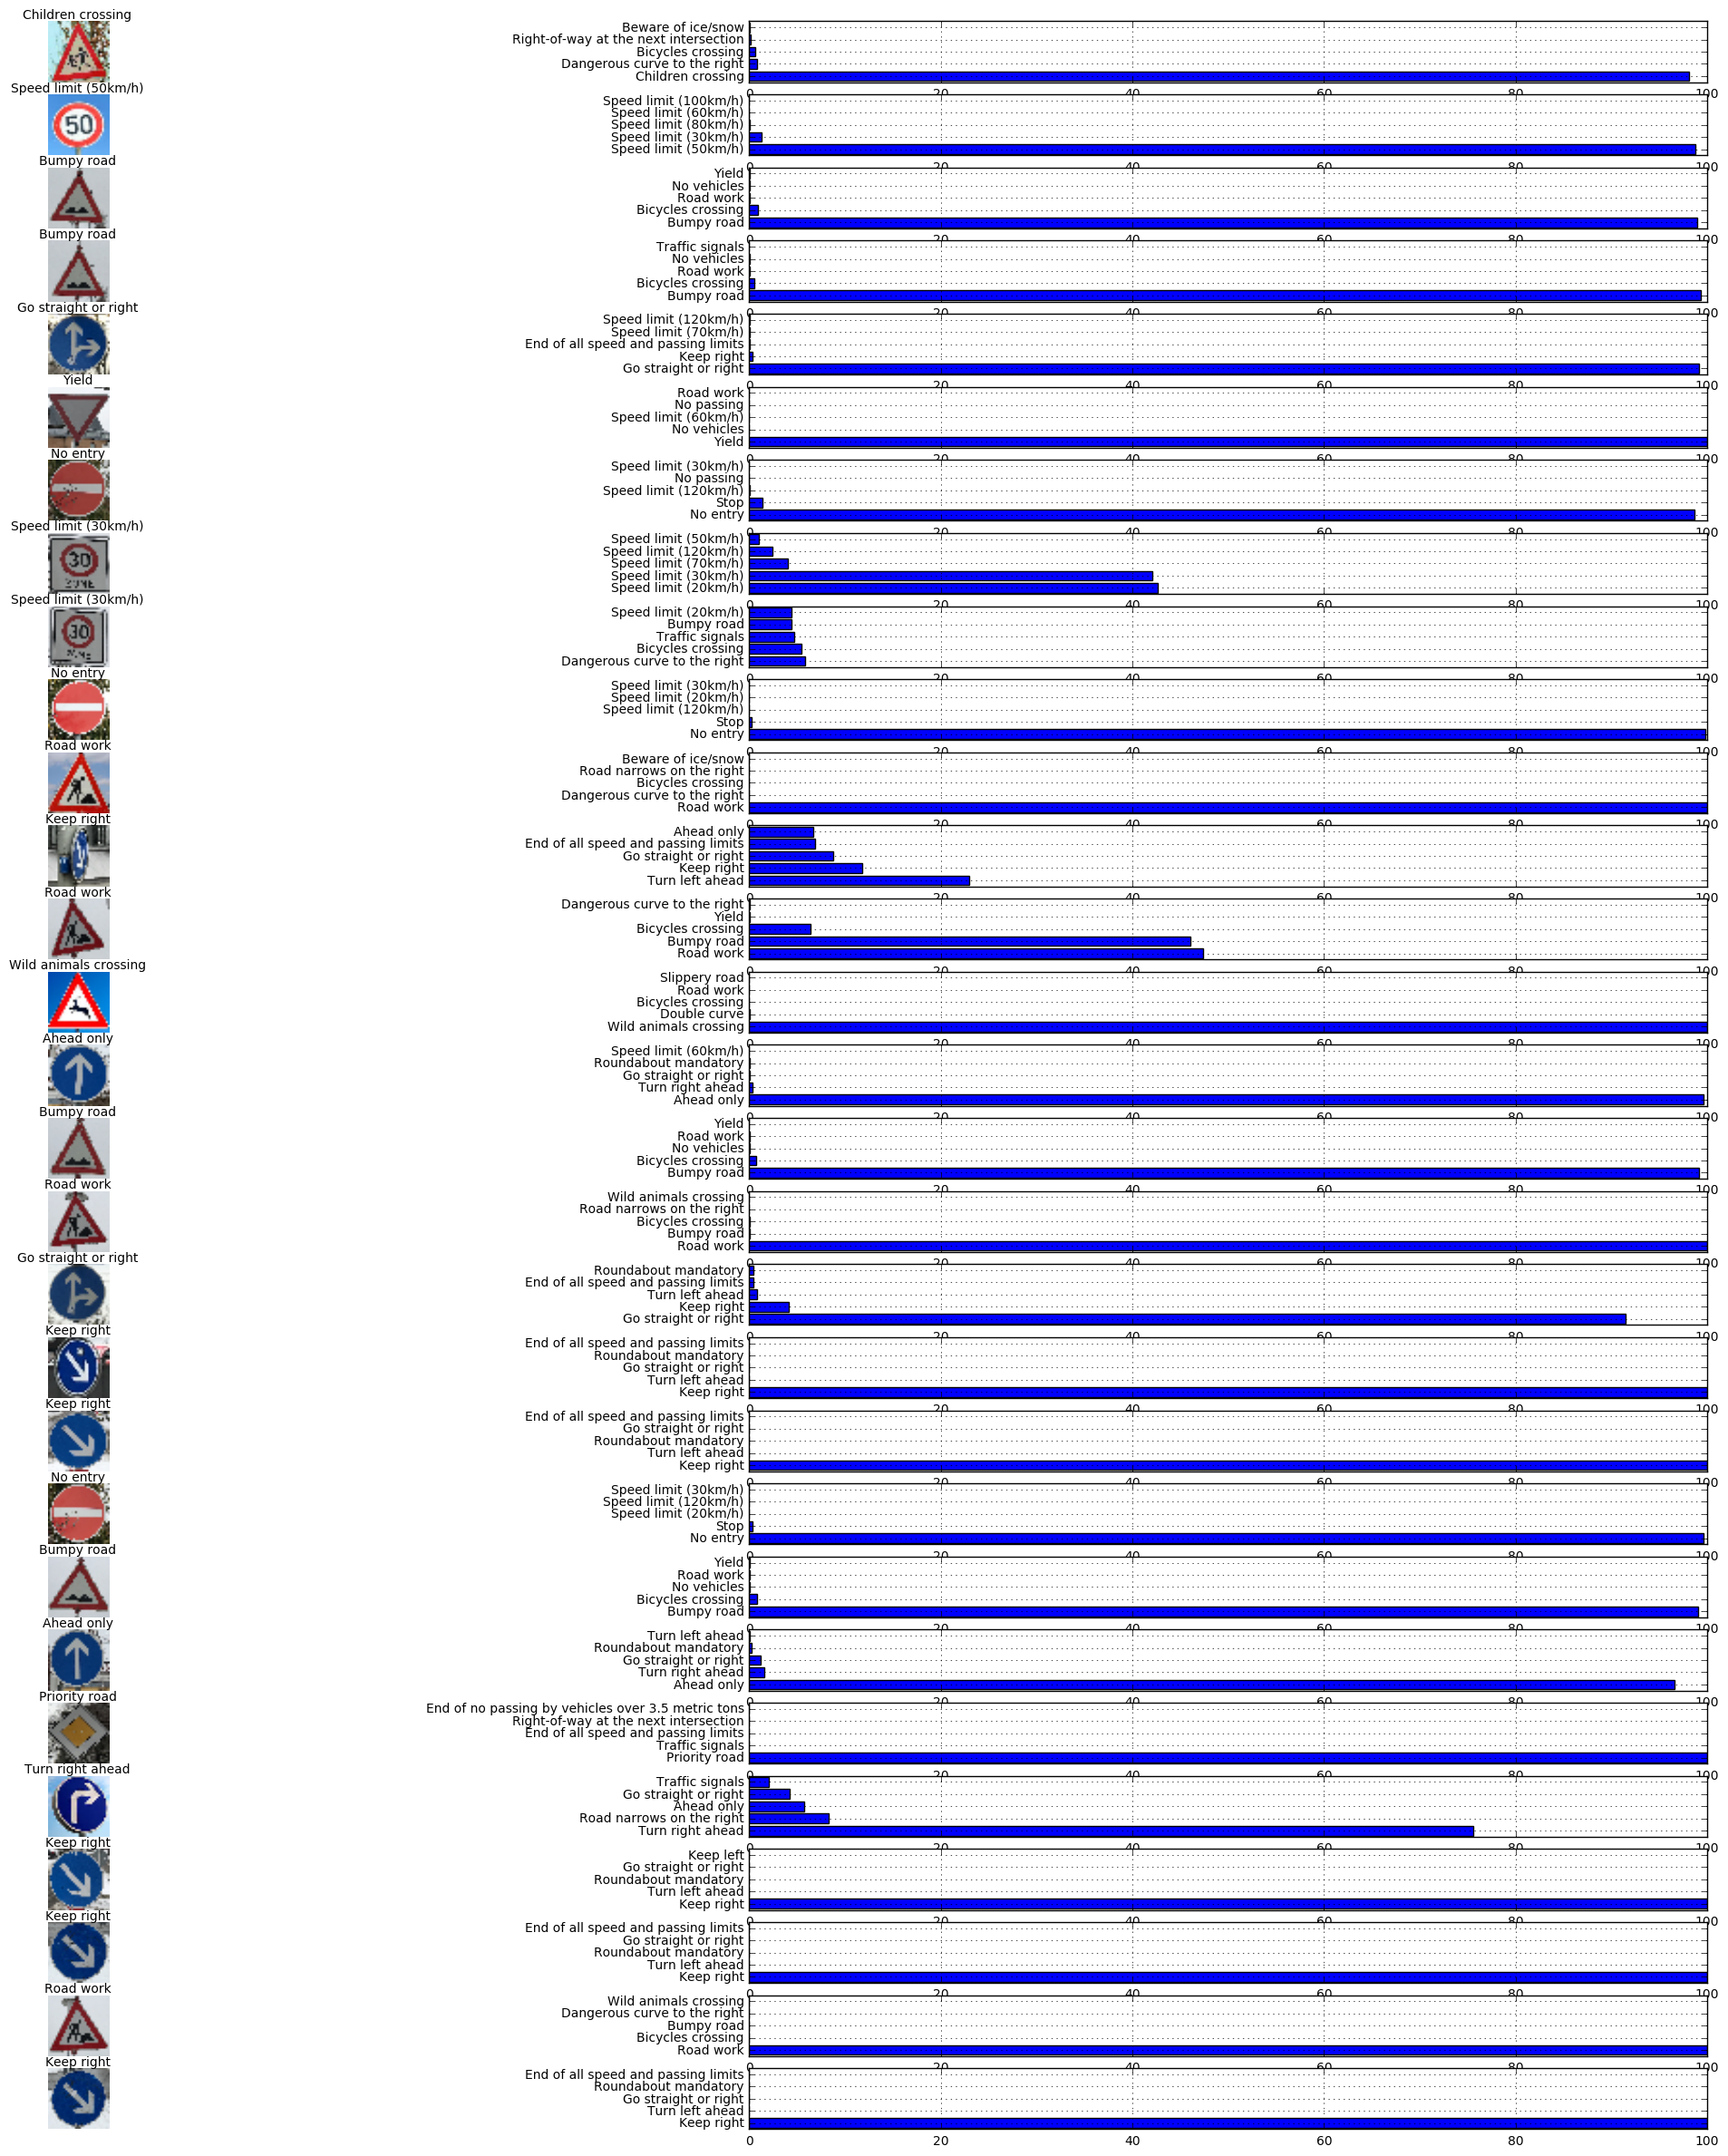

In [27]:
# Visualising all the predictions
plt.figure(figsize=[30,30])
    
for i in range(n_new_samples):
    plt.subplot(n_new_samples,2,2*i+1)
    plt.imshow(new_X_test[i])
    plt.axis('off')
    plt.text(15,-2,name_Dict[new_y_test[i]],horizontalalignment="center")
    plt.subplot(n_new_samples,2,2*i+2)
    p_val = top5_allvalues[i,:]*100
    y_val = [name_Dict[ind] for ind in top5_allindices[i,:]]
    pos = np.arange(5)+.5 
    plt.barh(pos,p_val, align='center')
    plt.yticks(pos,y_val)
    #plt.xlabel('Probabilities')
    plt.xlim([0,100])
    plt.grid(True)

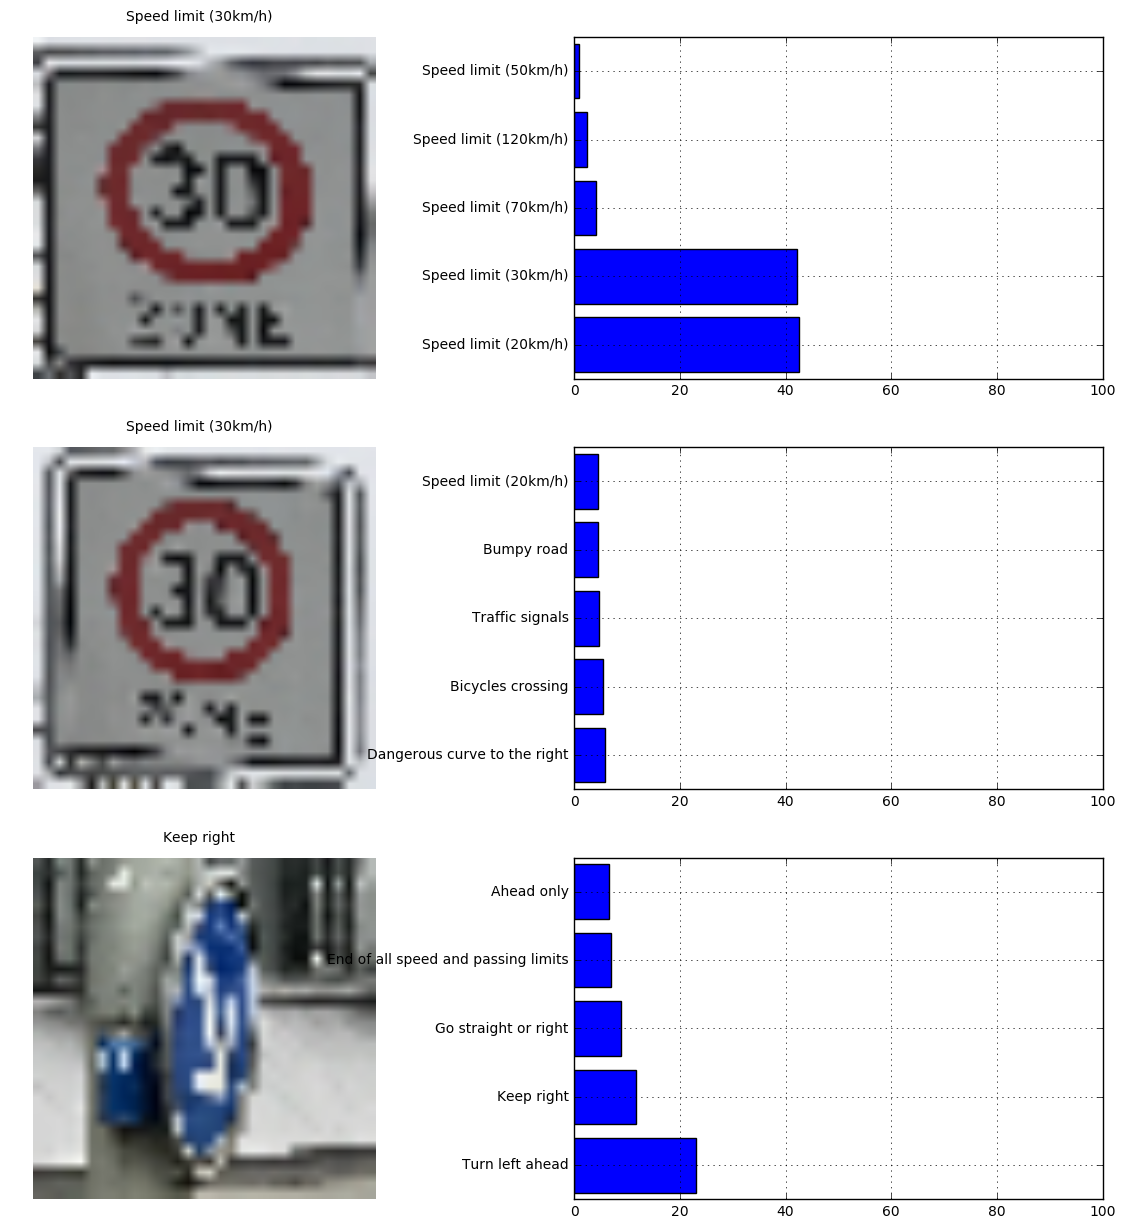

In [42]:
# visualizing the photos that were incorrectly labelled
pred_class = np.array([i[0] for i in top5_allindices])
int_index = np.nonzero(np.not_equal(pred_class,new_y_test))[0]
size_index = len(int_index)
plt.figure(figsize=[15,15])
cnt = 0
for i in int_index:
    plt.subplot(size_index,2,2*cnt+1)
    plt.imshow(new_X_test[i])
    plt.axis('off')
    plt.text(15,-2,name_Dict[new_y_test[i]],horizontalalignment="center")
    plt.subplot(size_index,2,2*cnt+2)
    p_val = top5_allvalues[i,:]*100
    y_val = [name_Dict[ind] for ind in top5_allindices[i,:]]
    pos = np.arange(5)+.5 
    plt.barh(pos,p_val, align='center')
    plt.yticks(pos,y_val)
    #plt.xlabel('Probabilities')
    plt.xlim([0,100])
    plt.grid(True)
    cnt += 1
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** After running the classifier on the new dataset, I found that there were only three images which were not classified properly. For the rest, the classifier seems very certain of its prediction. However, there was one correct classification done, for which the classifier was not too sure of it. This was a picture of 'road work' and the prediction probability was just a fraction higher than 'bumpy road'. Among the incorrect classifications, the 'speed limit of 30' had some problem and a badly warped image of 'keep right'. The correct prediction was among the top 5 for two of the incorrect identified classes. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.